In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

In [4]:
!pip install wordcloud
from wordcloud import WordCloud

In [6]:
twitter_training = pd.read_csv("C:/Users/keert/Downloads/archive (8)/twitter_training.csv", names=['ID', 'Topic', 'Sentiment', 'Content'])
twitter_validation = pd.read_csv("C:/Users/keert/Downloads/archive (8)/twitter_validation.csv", names=['ID', 'Topic', 'Sentiment', 'Content'])

In [7]:
data = pd.concat([twitter_training, twitter_validation], ignore_index=True)

In [8]:
print(data.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [9]:
data = data.drop_duplicates()
data = data.dropna()

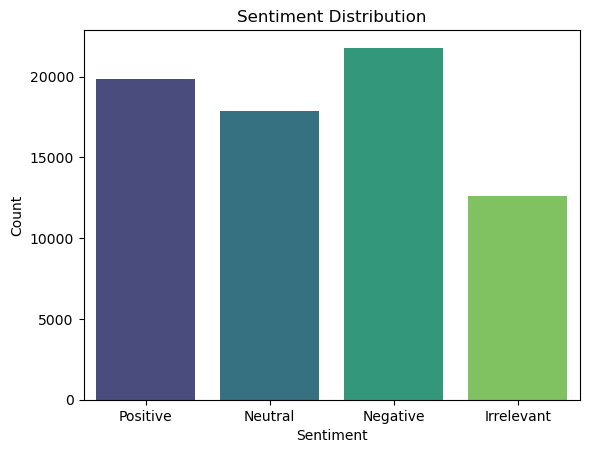

In [10]:
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

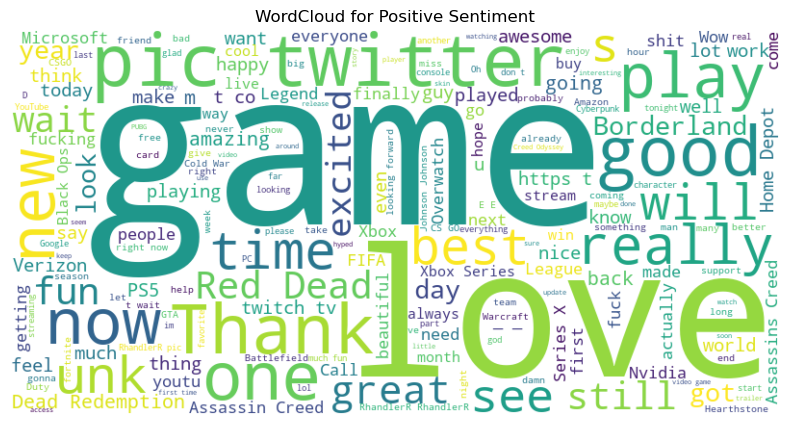

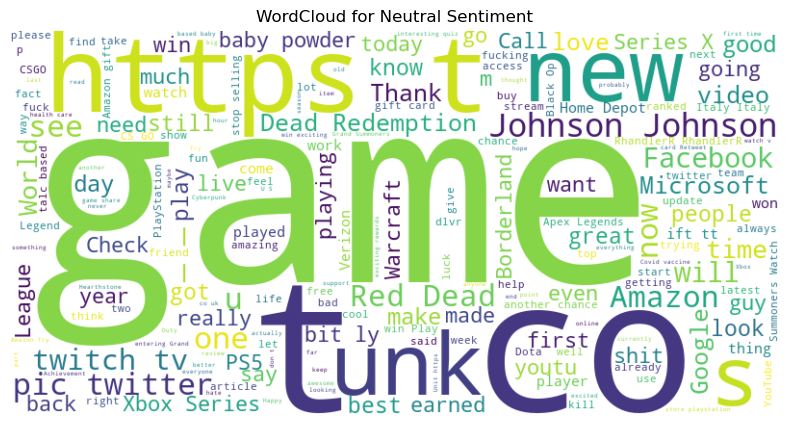

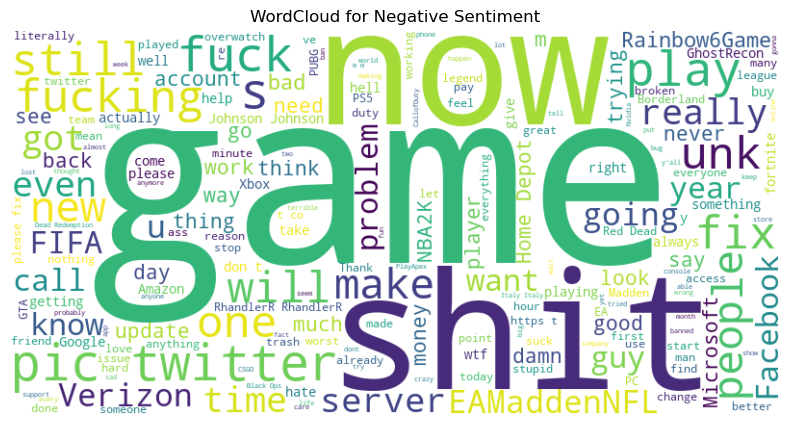

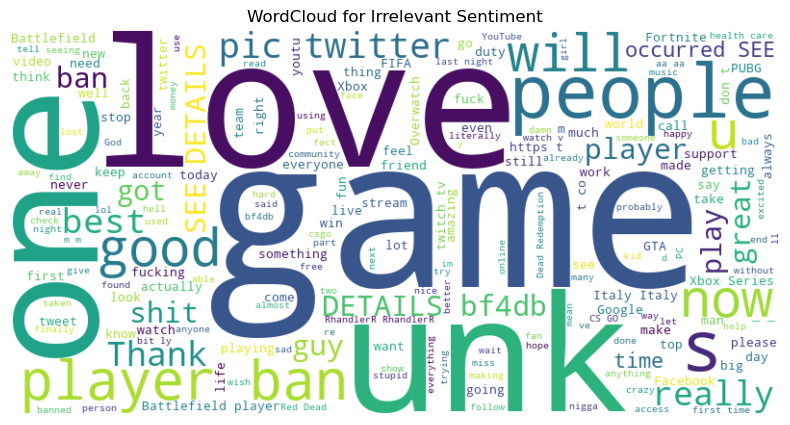

In [11]:
for sentiment in data['Sentiment'].unique():
    sentiment_text = ' '.join(data[data['Sentiment'] == sentiment]['Content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Sentiment')
    plt.show()

In [12]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['Content'])
y = data['Sentiment']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.74      0.37      0.49      2514
    Negative       0.63      0.81      0.71      4364
     Neutral       0.67      0.55      0.61      3594
    Positive       0.62      0.73      0.67      3956

    accuracy                           0.65     14428
   macro avg       0.67      0.62      0.62     14428
weighted avg       0.66      0.65      0.64     14428



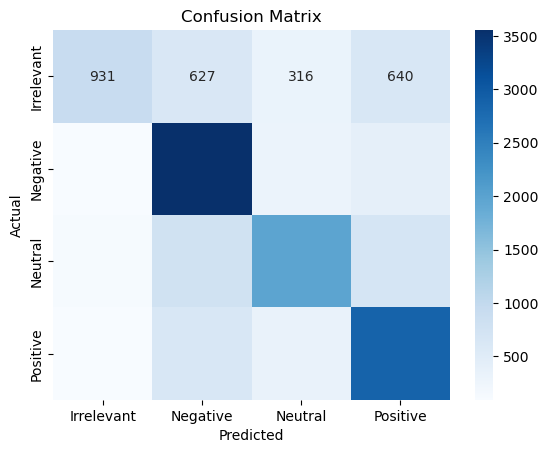

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
example_texts = [
    "I absolutely love this product! It's amazing!",
    "The service was terrible, and I won't come back.",
    "I'm neutral about the experience, nothing special.",
]
example_features = vectorizer.transform(example_texts)
example_preds = model.predict(example_features)
for text, sentiment in zip(example_texts, example_preds):
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")

Text: I absolutely love this product! It's amazing!
Predicted Sentiment: Positive

Text: The service was terrible, and I won't come back.
Predicted Sentiment: Negative

Text: I'm neutral about the experience, nothing special.
Predicted Sentiment: Positive

